# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Airplane'
fixed_points = 200
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(0)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [6]:
import wandb
import yaml
from test import configure

In [7]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\olvcp\\PycharmProjects\\HPCS\\notebooks\\config.yaml'

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [8]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/2h99glhk')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [9]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Distributed:  False
Gpu:  0


In [10]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/2h99glhk')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

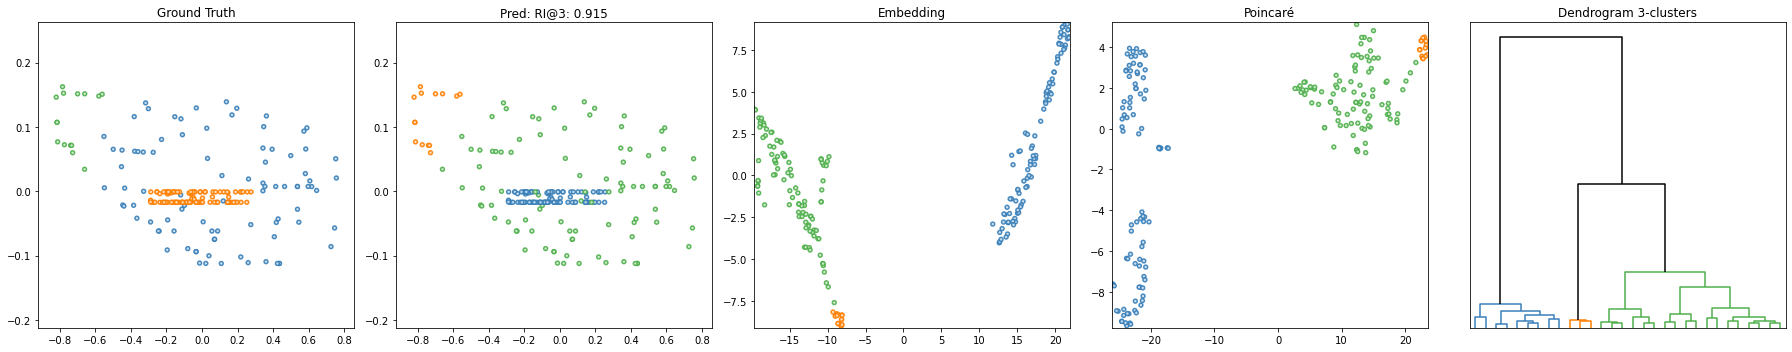

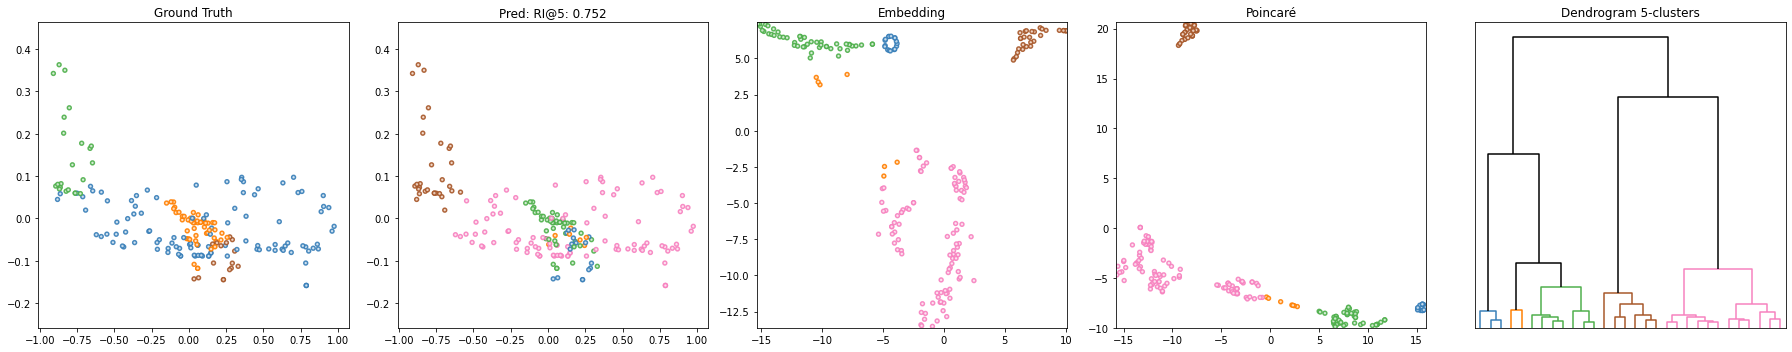

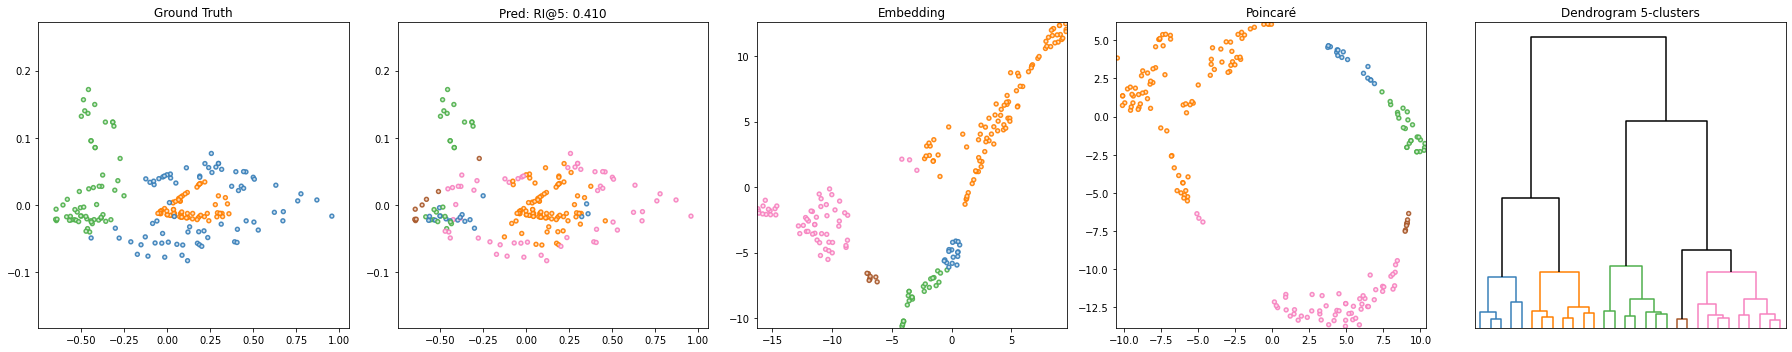

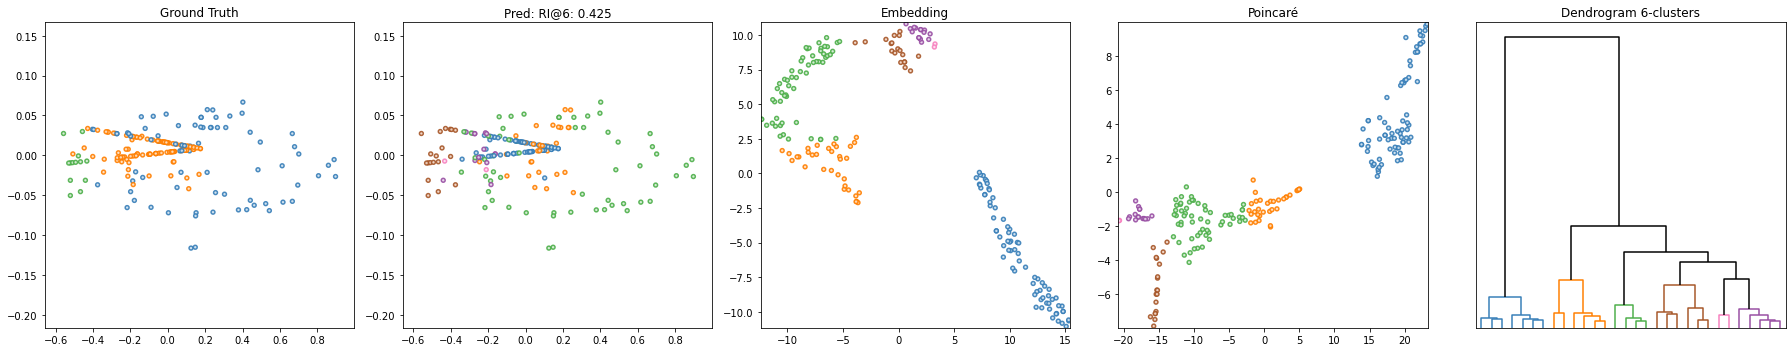

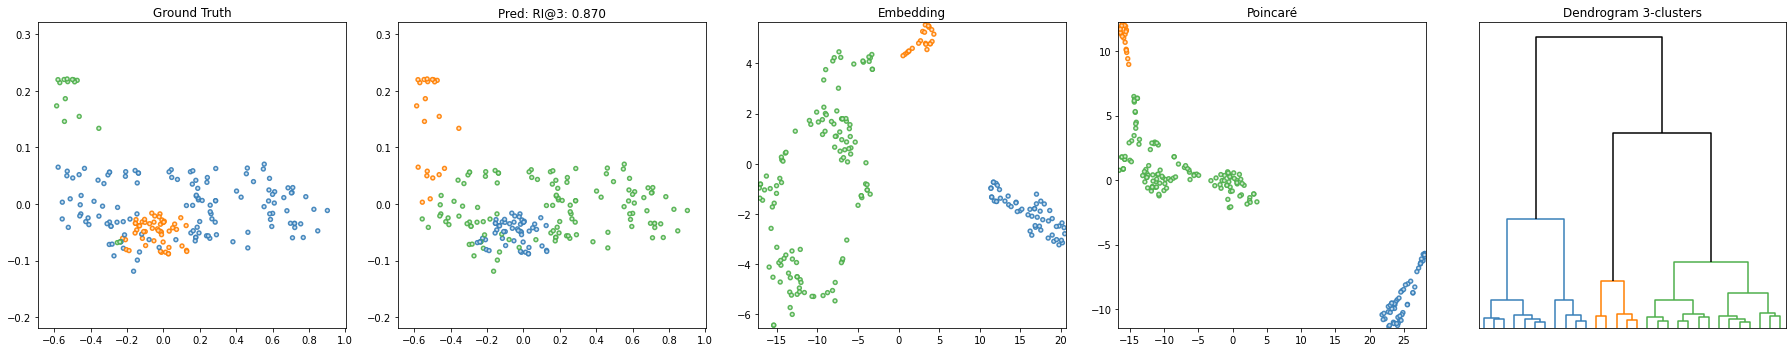

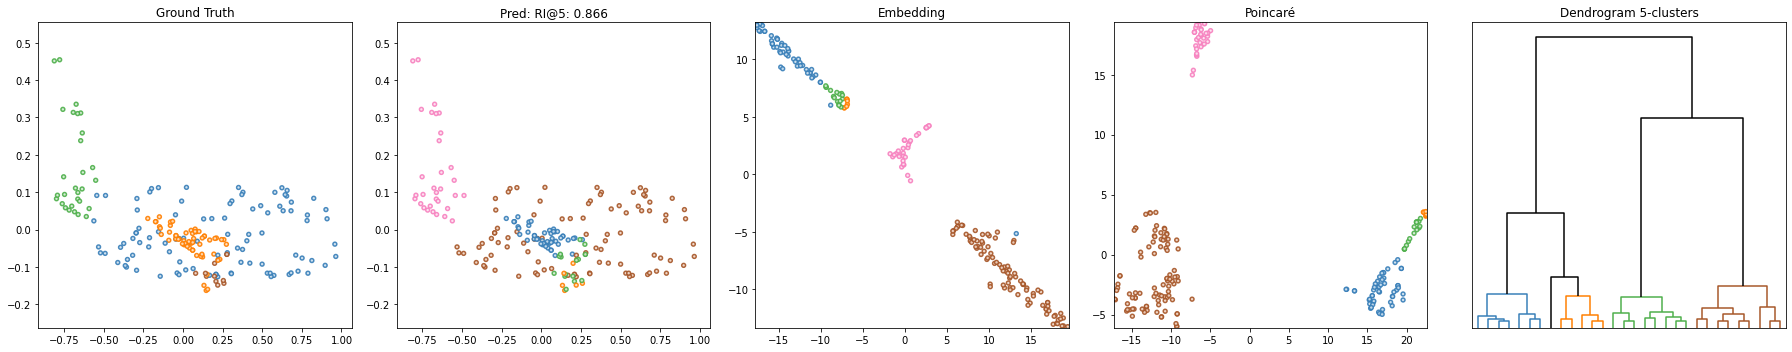

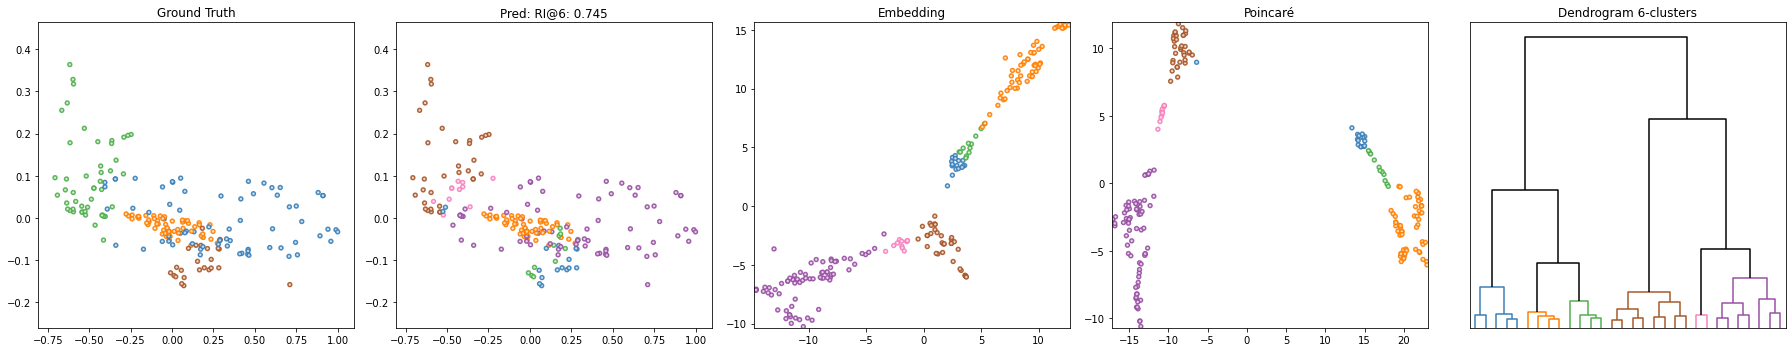

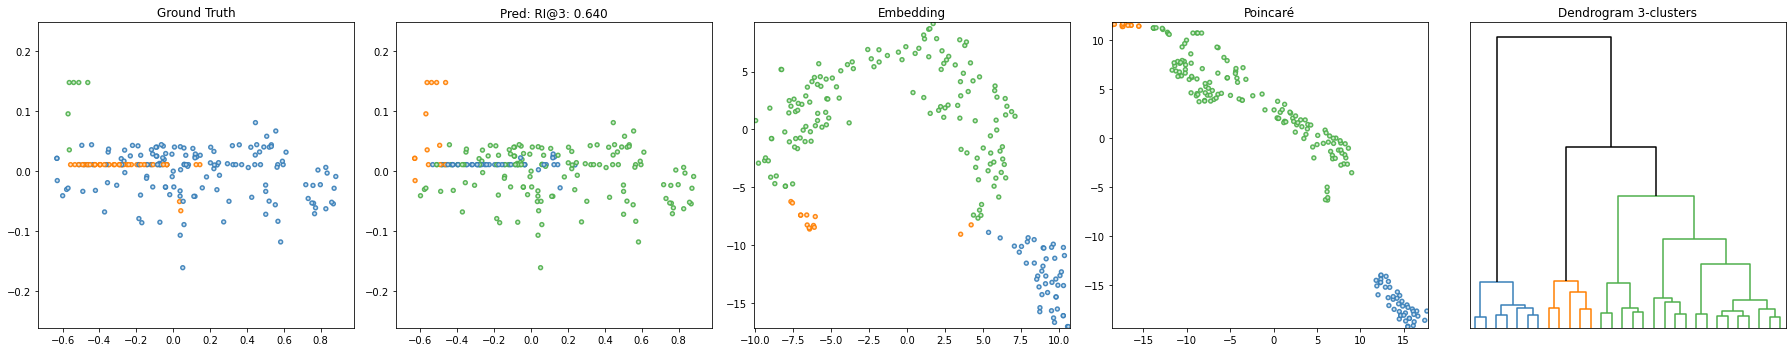

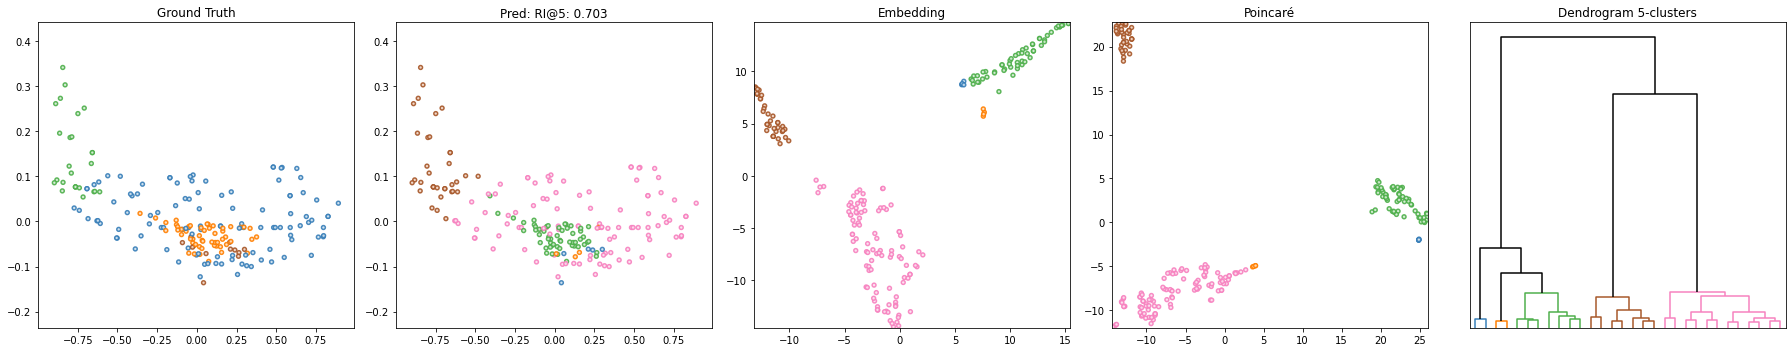

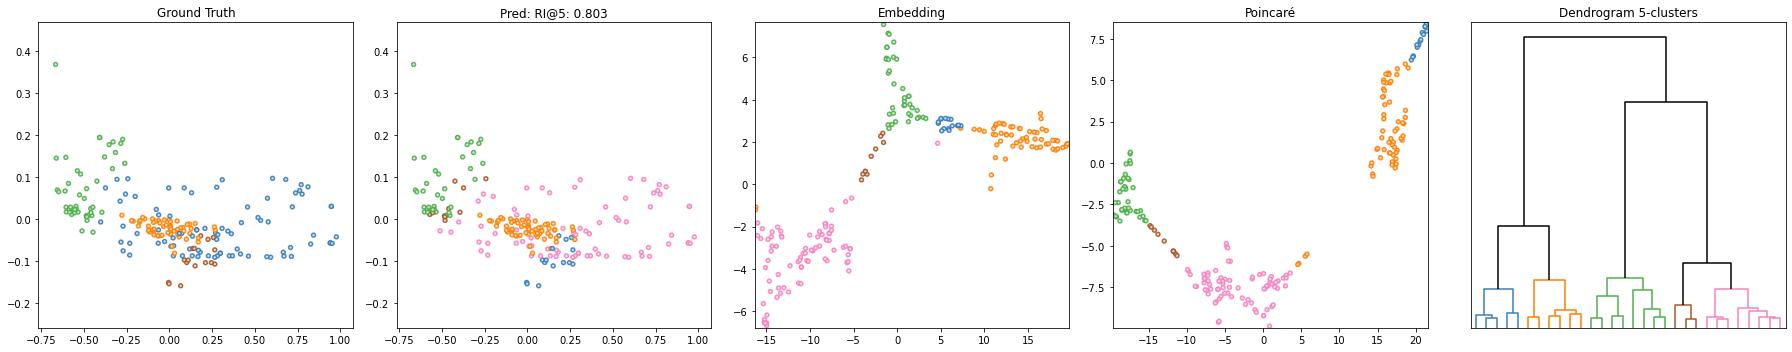

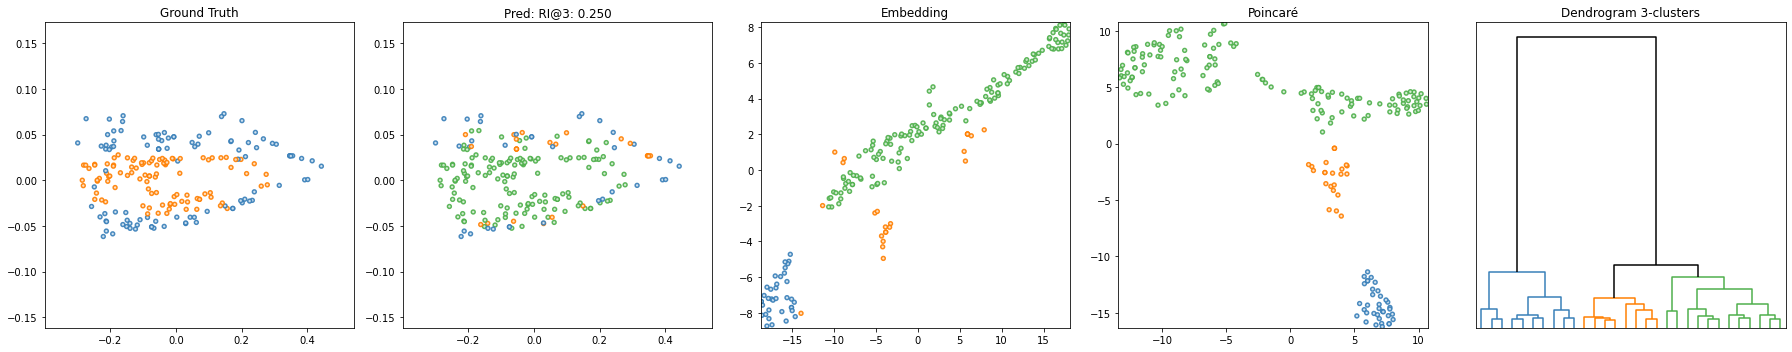

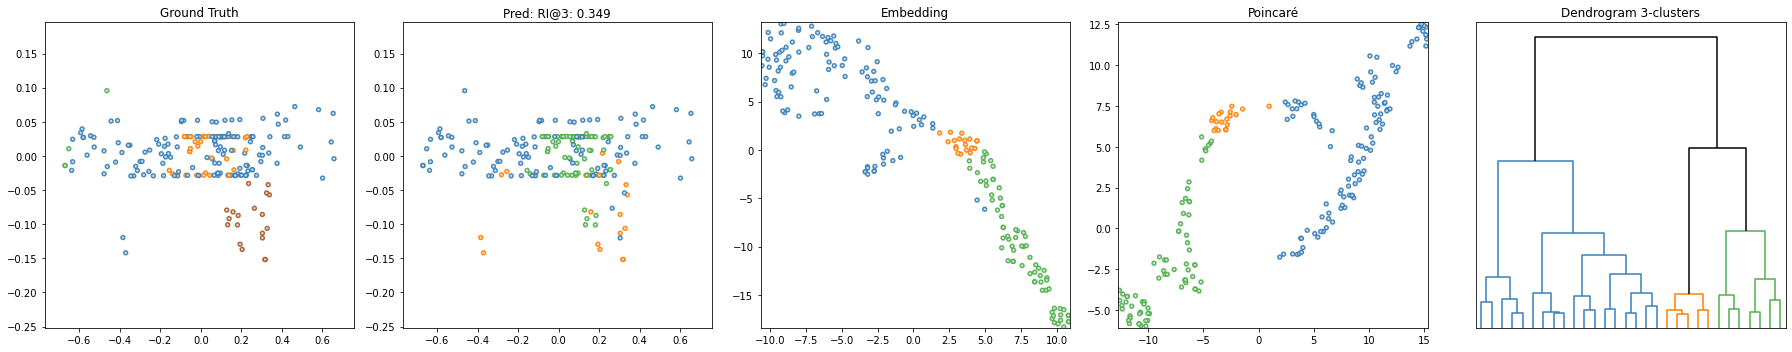

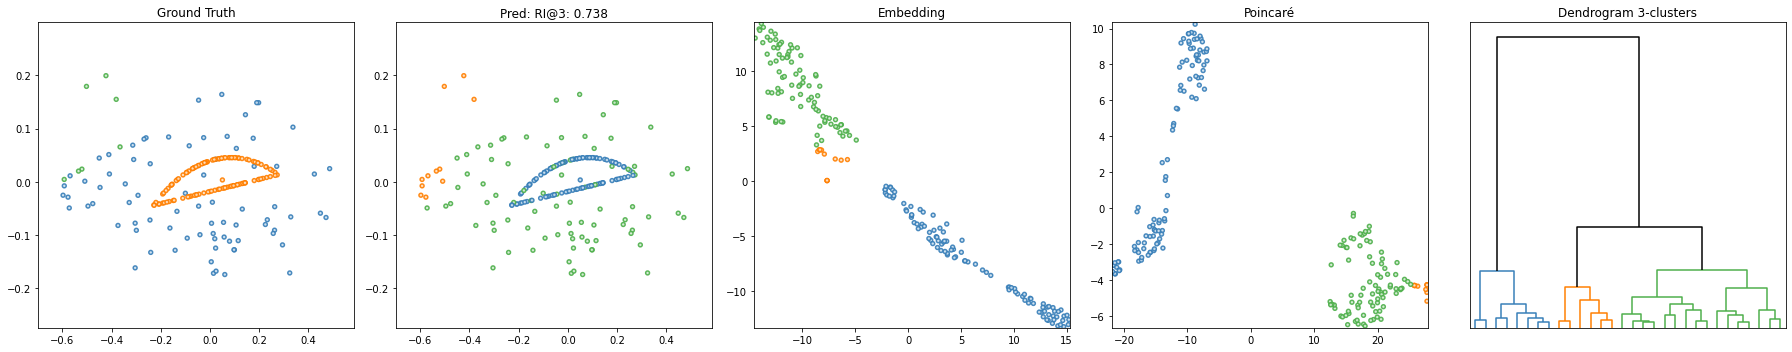

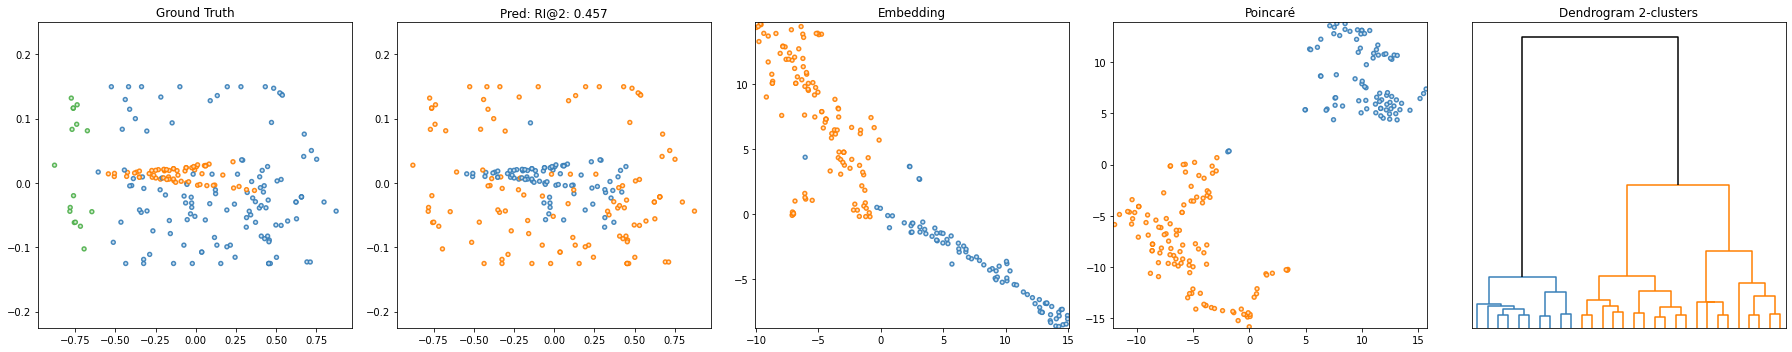

In [ ]:
trainer.test(model, test_loader)

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)